# Probability Mass Function

In [1]:
from empiricaldist import Pmf

In [2]:
coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


Can also make a Pmf from a sequencve of possible outcomes

In [3]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [4]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [5]:
letters['s']

0.36363636363636365

In the word "Mississippi", about 36% of the words are 's'

In [6]:
letters('t')

0

The letter 't' is not in the distribution

Can provide a sequence of quantities and get their respective probabilities

In [7]:
die([1,4,7])

array([0.16666667, 0.16666667, 0.        ])

# The Cookie Problem Revisited

In this section I'll use a `Pmf` to solve the cookie problem from <<_TheCookieProblem>>.
Here's the statement of the problem again:

> Suppose there are two bowls of cookies.
>
> * Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. 
>
> * Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.
>
> Now suppose you choose one of the bowls at random and, without looking, choose a cookie at random. If the cookie is vanilla, what is the probability that it came from Bowl 1?

Here's a Pmf that represents the two hypothesis and their prior probabilities:

In [8]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


Let's make the Prior Distribution

To update the distribution based on the new data (vanilla cookie), we update the priors by the likelihoods

Likelihood of drawing a vanilla cookie is 3/4

Likelihood for Bowl 2 is 1/2

In [9]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


Let's normalize the probabilities (make them add up to 1) using normalize method

In [10]:
posterior.normalize()

0.625

This returns the total probability of the data (P(D))

Posterior now contains the Posterior Distribution

In [11]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


In [12]:
posterior('Bowl 1')

0.6

Can do successive updates with more data.

For example, suppose you put the first cookie back (so the contents of the bowls don’t change) and draw again from the same bowl. If the second cookie is also vanilla, we can do a second update like this:

In [13]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


Posterior probability increased to nearly 70%.

Suppose we do the same thing again and get a chocolate cookie

Here are the likelihoods for the new data:

In [14]:
likelihood_chocolate = [0.25, 0.5]

# And here's the update
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


# 101 Bowls

Next let's solve a cookie problem with 101 bowls:

* Bowl 0 contains 0% vanilla cookies,

* Bowl 1 contains 1% vanilla cookies,

* Bowl 2 contains 2% vanilla cookies,

and so on, up to

* Bowl 99 contains 99% vanilla cookies, and

* Bowl 100 contains all vanilla cookies.

As in the previous version, there are only two kinds of cookies, vanilla and chocolate.  So Bowl 0 is all chocolate cookies, Bowl 1 is 99% chocolate, and so on.

Suppose we choose a bowl at random, choose a cookie at random, and it turns out to be vanilla.  What is the probability that the cookie came from Bowl $x$, for each value of $x$?

To solve this problem, I'll use `np.arange` to make an array that represents 101 hypotheses, numbered from 0 to 100.

In [15]:
import numpy as np

hypos = np.arange(101)

Now let's make the prior distribution

In [16]:
prior = Pmf(1, hypos)
prior.normalize()

101

First parameter is prior probability

Second parameter is the sequence of quantities

In this example, the probabilities are all the same, so we only have to provide one of them and it gets broadcast across the hypothesis

Uniform distribution - When all events have the same probability

In [17]:
prior.head()

,probs
0,0.009901
1,0.009901
2,0.009901


Likelihood of the data is the fraction of vanilla cookies in each bowl, which can calculate as follows:

In [18]:
likelihood_vanilla = hypos / 100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

Let's calculate posterior distribution the usual way:

In [19]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


Plot the prior and posterior distributions after one vanilla cookie

In [20]:
from utils import decorate

def decorate_bowls(title):
    decorate(xlabel = "Bowl #",
             ylabel = 'PMF',
             title = title)

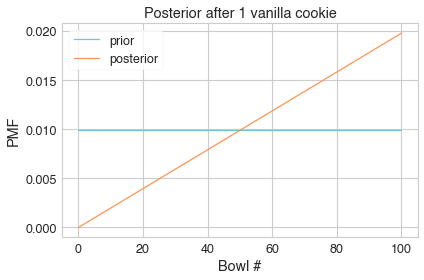

In [22]:
prior.plot(label='prior', color='C5')
posterior1.plot(label='posterior', color='C4')
decorate_bowls('Posterior after 1 vanilla cookie')

The posterior probability of Bowl 0 is 0 because it contains no vanilla cookies. The posterior probability of Bowl 100 is the highest because it contains the most vanilla cookies. In between, the shape of the posterior distribution is a line because the likelihoods are proportional to the bowl numbers

Now suppose we put the cookie back, draw again from the same bowl, and get another vanilla cookie. Here's the update after the second cookie:

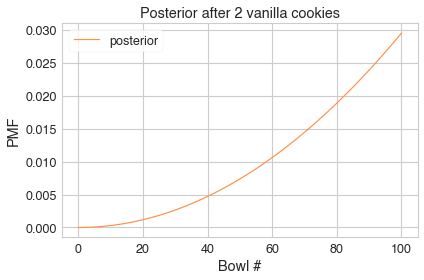

In [23]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()

# Plot the updated distribution
posterior2.plot(label = 'posterior', color='C4')
decorate_bowls('Posterior after 2 vanilla cookies')

After 2 vanilla cookies, the high-numbered bowls have the highest posterior probabilities because they contain the most vanilla cookies

The low-numbered bowls have the lowest probabilities

Suppose we draw again and get a chocolate cookie. Here's the update:

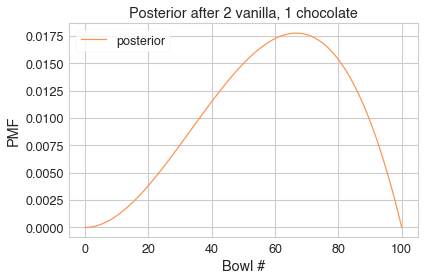

In [24]:
likelihood_chocolate = 1 - hypos/100

posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()

# The distribution
posterior3.plot(label='posterior', color='C4')
decorate_bowls('Posterior after 2 vanilla, 1 chocolate')

Bowl 100 has been eliminated because it contains no chocolate cookies

High-numbered bowls are still more likely than the low-numbered bowls, because we have seen more vanilla cookies than chocolate

Peak posterior distribution is at Bowl 67, which corresponds to the fraction of vanilla cookies in the data we've observed: 2/3

MAP ("Maximum a posteriori probability) --> The quantity with the highest posterior probability

To compute MAP:

In [27]:
print(posterior3.idxmax())

# Or
print(posterior3.max_prob())

67
67


This problem is about estimating proportions

This assumes uniform distribution

# The Dice Problem

Here's the statement of the problem:

> Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.

> I choose one of the dice at random, roll it, and report that the outcome is a 1.

> What is the probability that I chose the 6-sided die?

Let's solve it using a `Pmf`.
I'll use integers to represent the hypotheses:

In [28]:
hypos = [6, 8, 12]

# The prior distribution
prior = Pmf(1/3, hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [29]:
# Quantities in the distribution
prior.qs

array([ 6,  8, 12])

In [31]:
# Corresponding probabilities
prior.ps

array([0.33333333, 0.33333333, 0.33333333])

Likelihood for each hypothesis

In [33]:
likelihood1 = 1/6, 1/8, 1/12

THe update:

In [34]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


Now suppose I roll the same die again and get a 7. Here are the likelihoods:

In [35]:
likelihood2 = 0, 1/8, 1/12

The likelihoof for the 6-sided die is 0 because it's not possible to get a 7

The other two likelihoods are the same as the previous update

Here's the update:

In [36]:
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


# Update the Dice

In [41]:
def update_dice(pmf, data):
    '''
    Update pmf based on new data
    '''
    hypos = pmf.qs # The hypotheses
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

Let's put the function in action and computes the updates

In [42]:
pmf = prior.copy()

# Compute the updates
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


# Exercises

Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose one of the dice at random, roll it four times, and get 1, 3, 5, and 7. What is the probability that I chose the 8-sided die?

In [44]:
pmf = prior.copy()
for data in [1, 3, 5, 7]:
    update_dice(pmf, data)
    
pmf

,probs
6,0.000000
8,0.835052
12,0.164948


In the previous version of the dice problem, the prior probabilities are the same because the box contains one of each die. But suppose the box contains 1 die that is 4-sided, 2 dice that are 6-sided, 3 dice that are 8-sided, 4 dice that are 12-sided, and 5 dice that are 20-sided. I choose a die, roll it, and get a 7. What is the probability that I chose an 8-sided die?

Hint: To make the prior distribution, call Pmf with two parameters.

In [47]:
qs = [4, 6, 8, 12, 20] # The quantities (hypotheses)
ps = [1, 2, 3, 4, 5] # The number of times each quantity appears
pmf = Pmf(ps, qs)
update_dice(pmf, 7)
pmf

,probs
4,0.000000
6,0.000000
8,0.391304
12,0.347826
20,0.260870


Suppose I have two sock drawers. One contains equal numbers of black and white socks. The other contains equal numbers of red, green, and blue socks. Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair. What is the probability that the socks are white?

For simplicity, let’s assume that there are so many socks in both drawers that removing one sock makes a negligible change to the proportions.

In [51]:
# In the BlackWhite drawer, the probability of getting a match is 1/2
# In the RedGreenBlue drawer, the probability of a match is 1/3

hypos = ['BlackWhite', 'RedGreenBlue']
prior = Pmf(1/2, hypos)
likelihood = 1/2, 1/3
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
BlackWhite,0.6
RedGreenBlue,0.4
